In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['science', 'no-latex'])
%matplotlib inline

In [35]:
df = pd.read_csv(r'..\uptoDateResults.csv', names=['tg', 'tint', 'tc', 'w', 'gain', 'freq'])
df = df.loc[(df != 0).any(axis=1)]
df = df[df.gain != 0]
df.head()

,tg,tint,tc,w,gain,freq
0,140.0,220.0,7.00,700.0,0.112115,12.00
1,160.0,590.0,7.78,3100.0,0.330746,12.71
2,140.0,540.0,7.22,4000.0,0.302326,12.86
3,160.0,580.0,7.44,4900.0,0.257574,12.85
4,100.0,330.0,7.52,1200.0,0.131148,12.10


In [36]:
df.shape

(1714, 6)

In [37]:
for idx, _ in df.iterrows():
    if idx < 200:
        df.loc[idx, ['generation']] = 1
    else:
        generation = int((idx - 200) / 120 + 2)
        df.loc[idx, ['generation']] = generation

In [38]:
df

,tg,tint,tc,w,gain,freq,generation
0,140.0,220.0,7.00,700.0,0.112115,12.00,1.0
1,160.0,590.0,7.78,3100.0,0.330746,12.71,1.0
2,140.0,540.0,7.22,4000.0,0.302326,12.86,1.0
3,160.0,580.0,7.44,4900.0,0.257574,12.85,1.0
4,100.0,330.0,7.52,1200.0,0.131148,12.10,1.0
...,...,...,...,...,...,...,...
1709,190.0,420.0,5.80,3100.0,1.092276,13.93,14.0
1710,180.0,440.0,7.28,3100.0,0.997982,13.68,14.0
1711,200.0,440.0,7.10,3200.0,1.144845,13.80,14.0
1712,180.0,420.0,7.06,3100.0,1.054302,13.86,14.0


Text(0.5, 1.0, 'Evolution of the Brillouin gain and shift frequency')

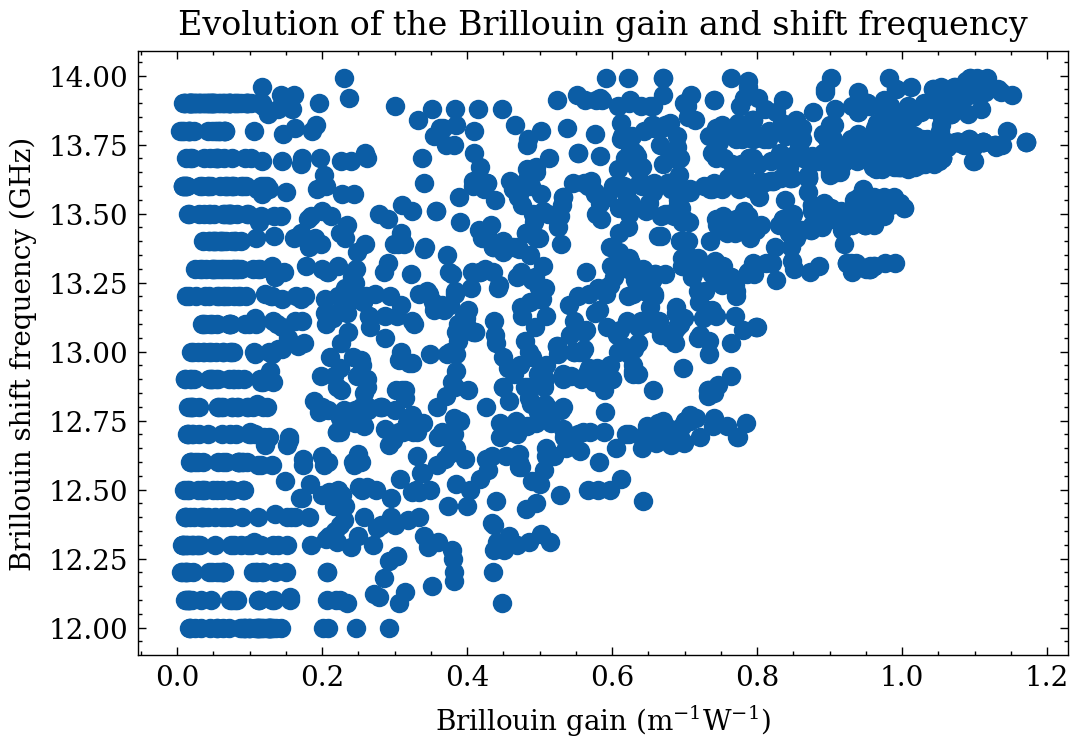

In [39]:
fig, subplots = plt.subplots(1,1,figsize=(6,4), dpi=200)
subplots.scatter(df['gain'], df['freq'])
subplots.set_xlabel(r'Brillouin gain ($\rm m^{-1}W^{-1}$)')
subplots.set_ylabel(r'Brillouin shift frequency (GHz)')
subplots.set_title(r'Evolution of the Brillouin gain and shift frequency')